Predecir dias con nieve teniendo en cuenta todos los demas valores

   Prom Max Media  Prom Min Media  Media  Lluvia total
0            10.0             1.6    5.6         315.2
1             9.4             0.9    5.6         310.1
2             9.7             2.2    5.1         478.7
3            10.1             1.7    5.6         357.4
4            10.7             2.3    6.4         301.0
Error cuadrático medio (MSE): 8.333333333333334


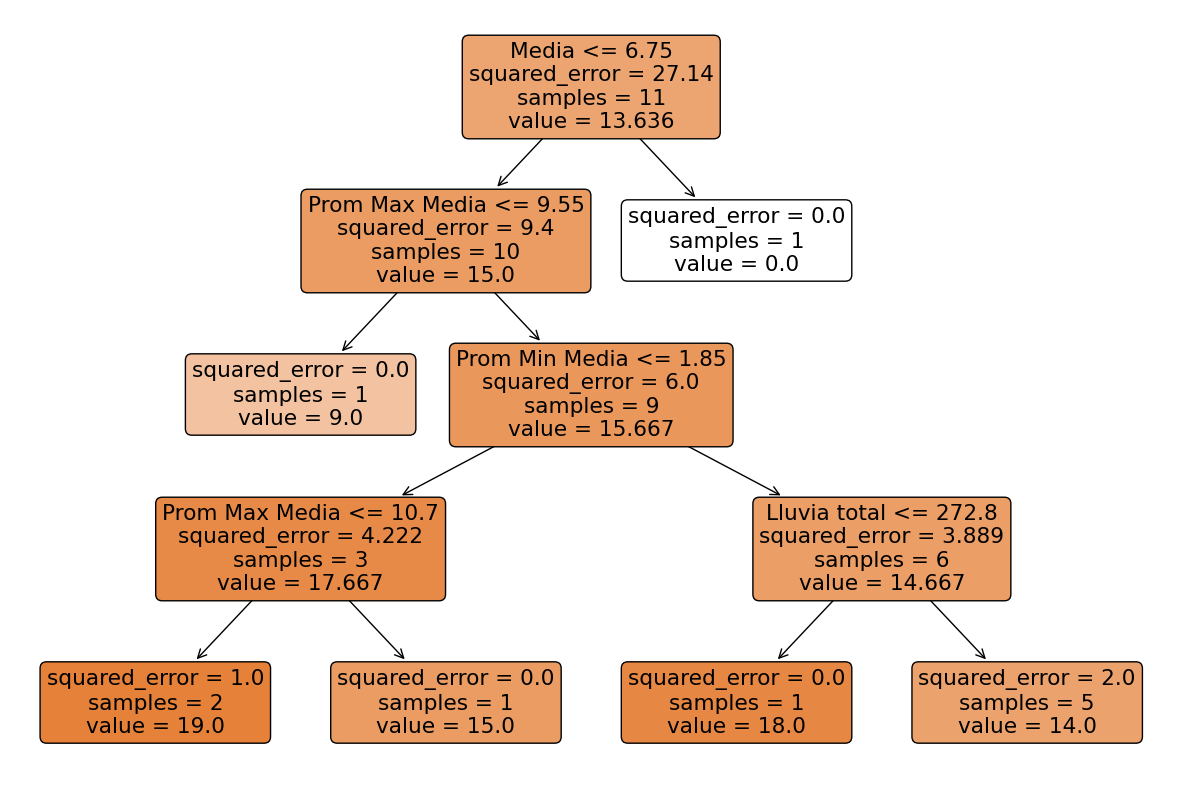

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Cargar los datos
dat_csv = pd.read_csv('Clima-rg-Año.csv', encoding="ISO-8859-1", delimiter=";")

# Eliminar espacios adicionales en los nombres de las columnas
dat_csv.columns = dat_csv.columns.str.strip()

# Reemplazar valores faltantes o incorrectos
dat_csv.replace(['-', '', ' ', '- -'], np.nan, inplace=True)
dat_csv['Dias con Nieve'] = dat_csv['Dias con Nieve'].fillna(0).astype(float)

# Reemplazar comas por puntos y convertir a números
columnas_a_corregir = ['Prom Max Media', 'Prom Min Media', 'Media', 'Lluvia total']

for columna in columnas_a_corregir:
    dat_csv[columna] = dat_csv[columna].str.replace(',', '.').astype(float)

# Verificar la conversión
print(dat_csv[columnas_a_corregir].head())


# Verificar y eliminar filas con valores faltantes
dat_csv.dropna(inplace=True)

# Seleccionar las características (X) y la variable objetivo (y)
X = dat_csv[['año', 'Prom Max Media', 'Prom Min Media', 'Media', 'Lluvia total']]
y = dat_csv['Dias con Nieve']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Visualizar el Árbol de Decisión
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Seleccionar las características (X) y la variable objetivo (y)
X = dat_csv[['Prom Max Media', 'Prom Min Media', 'Media', 'Lluvia total']]
y = dat_csv['Dias con Nieve'] 

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Crear un DataFrame para los valores de predicción
nueva_fila = pd.DataFrame([[10.0, 1.6, 5.6, 315.2]], columns=X.columns)

# Realizar la predicción con el DataFrame
nueva_prediccion = tree_model.predict(nueva_fila)
print(f"Predicción para los valores dados: {nueva_prediccion}")


Error cuadrático medio (MSE): 14.0
Predicción para los valores dados: [18.]
